In [1]:
##Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)

We use the pandas library to load the data from the CSV file into a DataFrame named data. This DataFrame will contain our dataset for analysis.

In [2]:
# Define the full path to your CSV file
file_path = "/home/angel/Downloads/superstore data (1).csv"

In [5]:
# Load the data
data = pd.read_csv(file_path, encoding='latin1')


In [6]:
print(data)


       Row ID         Order ID  Order Date Ship Date       Ship Mode  \
0       42433     AG-2011-2040    1/1/2011  6/1/2011  Standard Class   
1       22253    IN-2011-47883    1/1/2011  8/1/2011  Standard Class   
2       48883     HU-2011-1220    1/1/2011  5/1/2011    Second Class   
3       11731  IT-2011-3647632    1/1/2011  5/1/2011    Second Class   
4       22255    IN-2011-47883    1/1/2011  8/1/2011  Standard Class   
...       ...              ...         ...       ...             ...   
51285   32593   CA-2014-115427  31-12-2014  4/1/2015  Standard Class   
51286   47594     MO-2014-2560  31-12-2014  5/1/2015  Standard Class   
51287    8857   MX-2014-110527  31-12-2014  2/1/2015    Second Class   
51288    6852   MX-2014-114783  31-12-2014  6/1/2015  Standard Class   
51289   36388   CA-2014-156720  31-12-2014  4/1/2015  Standard Class   

      Customer ID     Customer Name      Segment         City  \
0        TB-11280   Toby Braunhardt     Consumer  Constantine   
1    

- `head()` method: It displays the first few rows of the DataFrame to get an overview of the data.

- `info()` method: It provides information about the data types of each column and the number of non-null values.

- `describe()` method: It gives descriptive statistics of the numerical variables, such as mean, standard deviation, minimum, maximum, and quartiles.

- `unique()` method: It helps to find unique categories in categorical variables. We used it specifically on the 'Market' column.


In [7]:
# Display the first few rows of the dataframe
print(data.head())

# Check the data types and missing values
print(data.info())

# Check the summary statistics for numerical variables
print(data.describe())

# Check the unique categories in categorical variables
print(data['Market'].unique())


   Row ID         Order ID Order Date Ship Date       Ship Mode Customer ID  \
0   42433     AG-2011-2040   1/1/2011  6/1/2011  Standard Class    TB-11280   
1   22253    IN-2011-47883   1/1/2011  8/1/2011  Standard Class    JH-15985   
2   48883     HU-2011-1220   1/1/2011  5/1/2011    Second Class      AT-735   
3   11731  IT-2011-3647632   1/1/2011  5/1/2011    Second Class    EM-14140   
4   22255    IN-2011-47883   1/1/2011  8/1/2011  Standard Class    JH-15985   

     Customer Name      Segment         City            State    Country  \
0  Toby Braunhardt     Consumer  Constantine      Constantine    Algeria   
1      Joseph Holt     Consumer  Wagga Wagga  New South Wales  Australia   
2    Annie Thurman     Consumer     Budapest         Budapest    Hungary   
3     Eugene Moren  Home Office    Stockholm        Stockholm     Sweden   
4      Joseph Holt     Consumer  Wagga Wagga  New South Wales  Australia   

   Postal Code  Market   Region        Product ID         Category  

In [8]:
# Check for missing values
print(data.isnull().sum())


Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


- **Create a column for Unit price (sale/quantity):** We create a new column named 'Unit_price' by dividing the 'Sales' column by the 'Quantity' column. This calculation gives us the price per unit of the product.

- **Convert Order Date and Ship Date to datetime format:** We convert the 'Order Date' and 'Ship Date' columns from string format to datetime format using the `pd.to_datetime()` function. This conversion allows us to perform date-based operations on these columns.

- **Create columns for Year and Month:** We extract the year and month components from the 'Order Date' column and create new columns named 'Year' and 'Month'. This extraction helps us analyze sales trends and patterns over time.

- **Calculate the interval between the order date and the shipping date in days:** We calculate the difference between the 'Ship Date' and 'Order Date' columns to determine the interval in days between when an order was placed and when it was shipped. This information can be useful for analyzing shipping efficiency and customer satisfaction.


In [9]:
# Create a column for Unit price (sale/quantity)
data['Unit_price'] = data['Sales'] / data['Quantity']

# Convert Order Date and Ship Date to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

# Create columns for Year and Month
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month

# Calculate the interval between the order date and the shipping date in days
data['Shipping_interval_days'] = (data['Ship Date'] - data['Order Date']).dt.days


- We created a new column called 'Unit_price' by dividing the 'Sales' by the 'Quantity' columns. This calculation yields the price per unit of the product.

- We converted the 'Order Date' and 'Ship Date' columns to datetime format using the `pd.to_datetime()` function. This conversion allows for time-based operations to be performed on these columns.

- Subsequently, we created new columns for 'Year' and 'Month' to extract the year and month components from the 'Order Date' column. This extraction facilitates analysis of sales trends and patterns over time.

- Finally, we calculated the 'Shipping_interval_days' by subtracting the 'Order Date' from the 'Ship Date' and converting the result to days. This interval provides insights into the efficiency of the shipping process and customer satisfaction metrics.


In [10]:
# Group by Market and calculate total sales and profit
market_sales_profit = data.groupby('Market').agg({'Sales': 'sum', 'Profit': 'sum'})
print(market_sales_profit)


               Sales        Profit
Market                            
APAC    3.585744e+06  436000.04900
Africa  7.837732e+05   88871.63100
Canada  6.692817e+04   17817.39000
EMEA    8.061613e+05   43897.97100
EU      2.938089e+06  372829.74150
LATAM   2.164605e+06  221643.48708
US      2.297201e+06  286397.02170


- I grouped the data by the 'Market' column and used the `agg()` method to aggregate the 'Sales' and 'Profit' columns by summing them up for each market.




### Question 1: What is the sales and profit per market?

- **Sales and Profit per Market:**
  - **APAC:**
    - Sales: $3,585,744
    - Profit: $436,000.049
  - **Africa:**
    - Sales: $783,773.2
    - Profit: $88,871.631
  - **Canada:**
    - Sales: $66,928.17
    - Profit: $17,817.39
  - **EMEA:**
    - Sales: $806,161.3
    - Profit: $43,897.971
  - **EU:**
    - Sales: $2,938,089
    - Profit: $372,829.7415
  - **LATAM:**
    - Sales: $2,164,605
    - Profit: $221,643.48708
  - **US:**
    - Sales: $2,297,201
    - Profit: $286,397.0217

These figures represent the total sales and profit for each market. Let me know if you need any further information!



### Question 2: What is the most and least profitable market?

- **Most Profitable Market:**
  - The EU market has the highest total profit of $372,829.7415.

- **Least Profitable Market:**
  - The Canada market has the lowest total profit of $17,817.39.





### Question 3: How are you going to increase the sales for the products that least bought?

To increase sales for the products that are least bought, several strategies can be employed:

1. **Targeted Marketing Campaigns:** Identify the target audience for the least bought products and create marketing campaigns tailored to their interests and needs.

2. **Discounts and Promotions:** Offer discounts, promotions, or special offers for the least bought products to incentivize customers to purchase them.

3. **Enhanced Product Visibility:** Improve the visibility of the least bought products by featuring them prominently on the company's website, in-store displays, or marketing materials.

4. **Customer Feedback Analysis:** Analyze customer feedback and reviews to understand why the least bought products are not selling well. Use this insight to make necessary improvements or adjustments to the products.

5. **Diversification of Product Offerings:** Consider diversifying the product offerings by introducing new variations or complementary products that appeal to the target market.


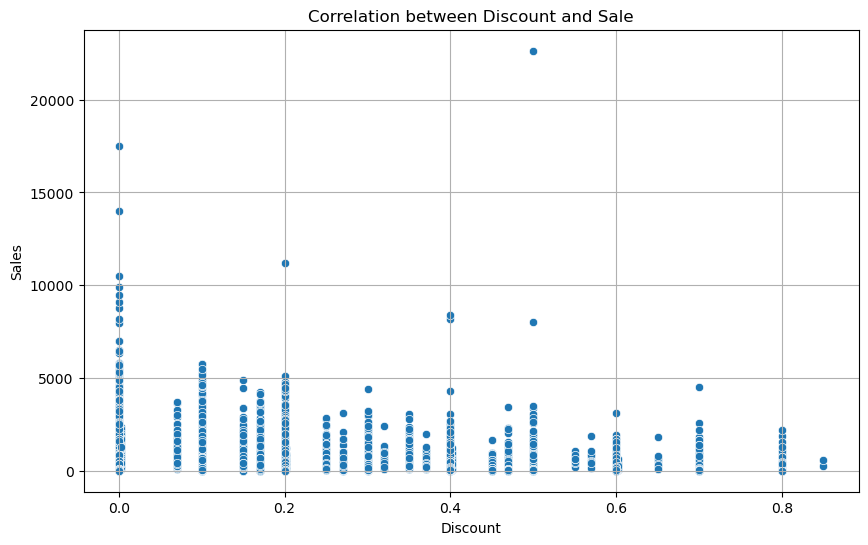

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Sales', data=data)
plt.title('Correlation between Discount and Sale')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.grid(True)
plt.show()
